In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vacancies = pd.read_csv("../scraper/vacancies.csv")
print(vacancies.head(15))

                                          title      company  \
0               Python Backend Engineerдо $3500     Enquirik   
1   Python and DSP Algorithms Software Engineer       Luxoft   
2         Junior Python/Django Developerдо $700    TeraFlops   
3     Trainee/Junior Python Developer IRC239337  GlobalLogic   
4                 Back-end software development        DeepX   
5                   Python developer (Scraping)  Quintagroup   
6              Python Developer/Architect (IoT)  Quintagroup   
7                          Python UAV Developer      Quantum   
8                        Middle Python Engineer     Equals 5   
9                          Lead Python Engineer      Nucleus   
10                      Senior Python Developer      Nucleus   
11                   Python ML Engineerдо $3500        Elbax   
12                             Python developer       Xedrum   
13            Python (Django) developerдо $2000    SheepFish   
14                      Senior Python De

In [4]:
# Interpolate missing values for numeric columns
vacancies['experience_years'] = vacancies['experience_years'].interpolate()
vacancies['salary'] = vacancies['salary'].interpolate()

# Fill NaN values for categorical columns with 'Unknown'
vacancies['english_level'] = vacancies['english_level'].fillna('Unknown')

print(vacancies)

                                          title      company  \
0               Python Backend Engineerдо $3500     Enquirik   
1   Python and DSP Algorithms Software Engineer       Luxoft   
2         Junior Python/Django Developerдо $700    TeraFlops   
3     Trainee/Junior Python Developer IRC239337  GlobalLogic   
4                 Back-end software development        DeepX   
5                   Python developer (Scraping)  Quintagroup   
6              Python Developer/Architect (IoT)  Quintagroup   
7                          Python UAV Developer      Quantum   
8                        Middle Python Engineer     Equals 5   
9                          Lead Python Engineer      Nucleus   
10                      Senior Python Developer      Nucleus   
11                   Python ML Engineerдо $3500        Elbax   
12                             Python developer       Xedrum   
13            Python (Django) developerдо $2000    SheepFish   
14                      Senior Python De

In [6]:
print(vacancies.info())
print(vacancies.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             15 non-null     object 
 1   company           15 non-null     object 
 2   experience_years  14 non-null     float64
 3   salary            15 non-null     float64
 4   english_level     15 non-null     object 
 5   skills_required   15 non-null     object 
dtypes: float64(2), object(4)
memory usage: 852.0+ bytes
None
title               0
company             0
experience_years    1
salary              0
english_level       0
skills_required     0
dtype: int64


In [5]:
mean_experience_years = vacancies['experience_years'].mean()
vacancies['experience_years'] = vacancies['experience_years'].fillna(mean_experience_years)

vacancies['experience_years'] = vacancies['experience_years'].astype(int)
vacancies['salary'] = vacancies['salary'].astype(int)

vacancies.loc[2, 'experience_years'] = 1

print(vacancies)

                                          title      company  \
0               Python Backend Engineerдо $3500     Enquirik   
1   Python and DSP Algorithms Software Engineer       Luxoft   
2         Junior Python/Django Developerдо $700    TeraFlops   
3     Trainee/Junior Python Developer IRC239337  GlobalLogic   
4                 Back-end software development        DeepX   
5                   Python developer (Scraping)  Quintagroup   
6              Python Developer/Architect (IoT)  Quintagroup   
7                          Python UAV Developer      Quantum   
8                        Middle Python Engineer     Equals 5   
9                          Lead Python Engineer      Nucleus   
10                      Senior Python Developer      Nucleus   
11                   Python ML Engineerдо $3500        Elbax   
12                             Python developer       Xedrum   
13            Python (Django) developerдо $2000    SheepFish   
14                      Senior Python De

In [6]:
vacancies.describe()

,experience_years,salary
count,15.000000,15.000000
mean,3.600000,2986.666667
std,1.404076,1294.834058
min,1.000000,700.000000
25%,2.500000,2000.000000
50%,4.000000,3500.000000
75%,5.000000,3500.000000
max,5.000000,5000.000000


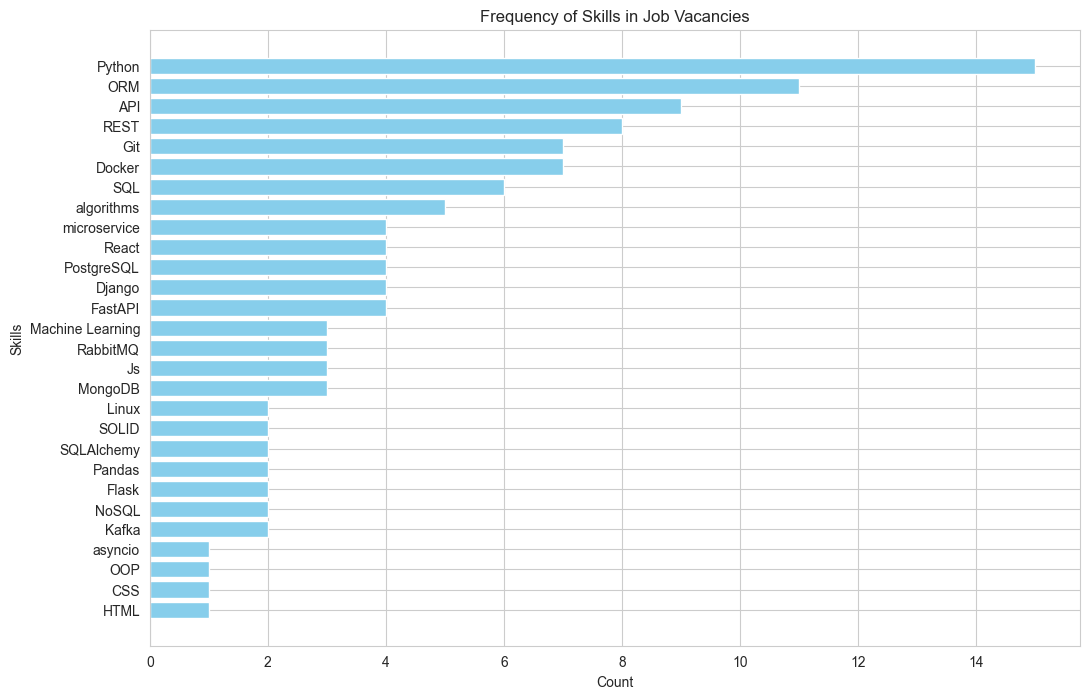

In [7]:
from collections import Counter


skills_list = vacancies['skills_required'].dropna().str.split(', ', expand=True).stack()

skills_count = Counter(skills_list)

skills_df = pd.DataFrame(skills_count.items(), columns=['Skill', 'Count'])

skills_df = skills_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(skills_df['Skill'], skills_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Skills')
plt.title('Frequency of Skills in Job Vacancies')
plt.gca().invert_yaxis()
plt.show()

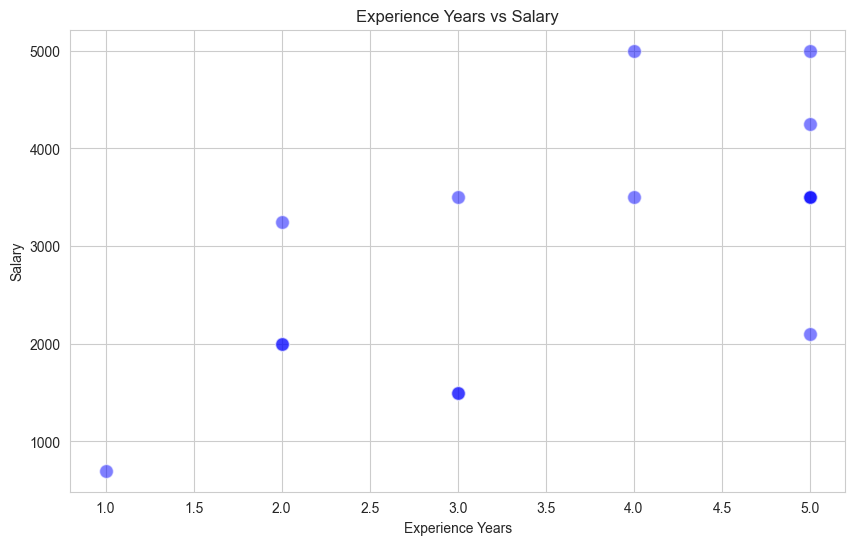

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(vacancies['experience_years'], vacancies['salary'], alpha=0.5, color='blue', edgecolors='w', s=100)
plt.title('Experience Years vs Salary')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

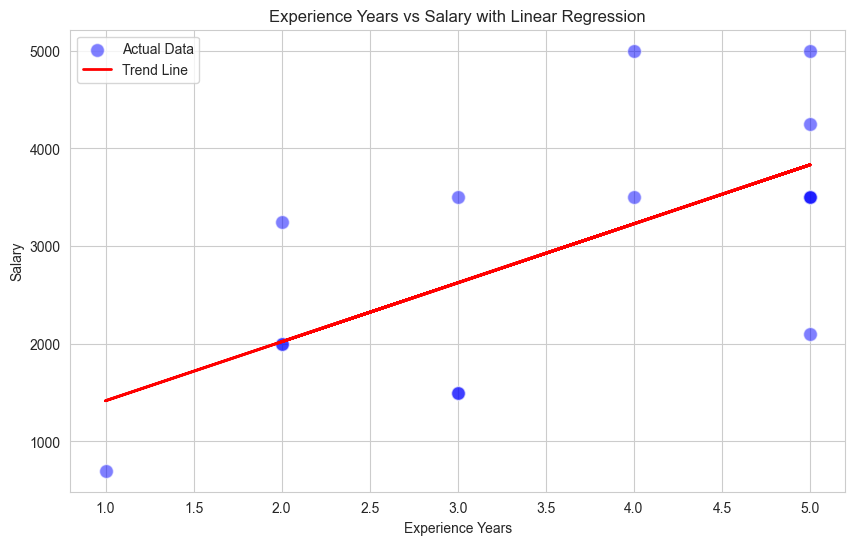

In [9]:
from sklearn.linear_model import LinearRegression


vacancies.loc[2, 'experience_years'] = 1
X = vacancies[['experience_years']].values
y = vacancies['salary'].values

model = LinearRegression()
model.fit(X, y)

predicted_salary = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(vacancies['experience_years'], vacancies['salary'], alpha=0.5, color='blue', edgecolors='w', s=100, label='Actual Data')
plt.plot(vacancies['experience_years'], predicted_salary, color='red', linewidth=2, label='Trend Line')
plt.title('Experience Years vs Salary with Linear Regression')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

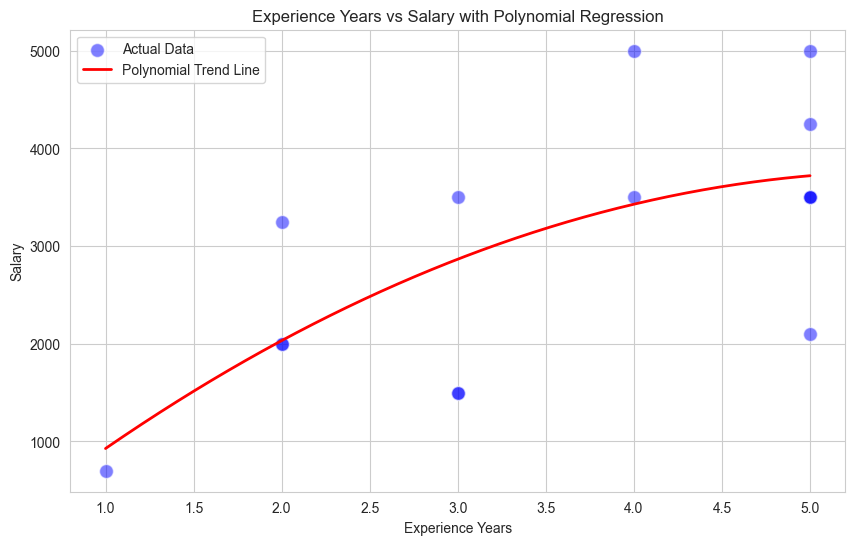

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

vacancies.loc[2, 'experience_years'] = 1

X = vacancies[['experience_years']].values
y = vacancies['salary'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict salary based on experience
X_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
predicted_salary_poly = model.predict(X_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(vacancies['experience_years'], vacancies['salary'], alpha=0.5, color='blue', edgecolors='w', s=100, label='Actual Data')
plt.plot(X_range, predicted_salary_poly, color='red', linewidth=2, label='Polynomial Trend Line')
plt.title('Experience Years vs Salary with Polynomial Regression')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

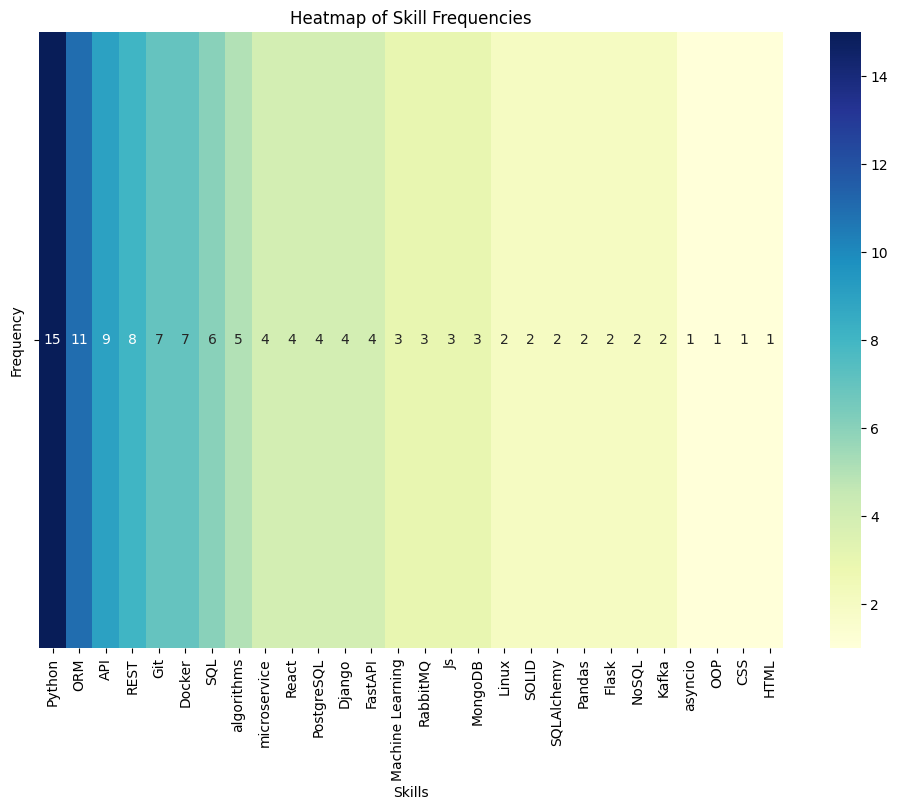

In [16]:
import seaborn as sns


skills_list = vacancies['skills_required'].dropna().str.split(', ', expand=True).stack()
skills_freq = skills_list.value_counts()

skills_df = pd.DataFrame({
    'Skill': skills_freq.index,
    'Frequency': skills_freq.values
})

plt.figure(figsize=(12, 8))
sns.heatmap(skills_df.set_index('Skill').T, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Skill Frequencies')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

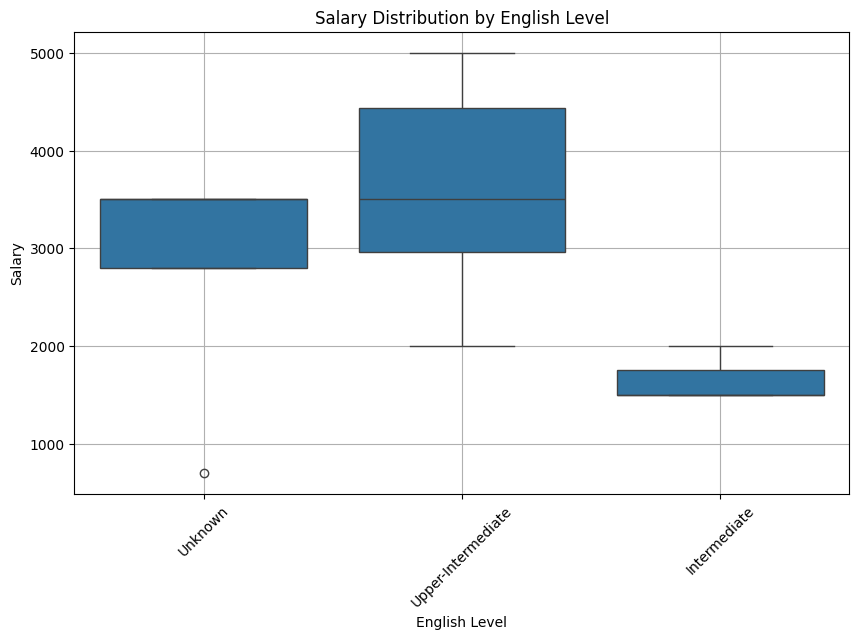

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='english_level', y='salary', data=vacancies)
plt.title('Salary Distribution by English Level')
plt.xlabel('English Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

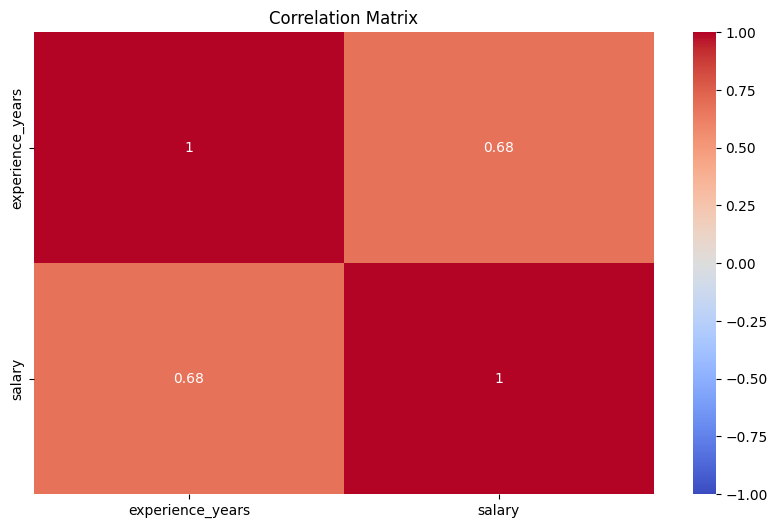

In [63]:
plt.figure(figsize=(10, 6))
corr = vacancies[['experience_years', 'salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()